# Radial Plot

Radial designs often pair well with periodic data. The visualization below from Nadieh Bremer and Zan Armstrong makes use of the periodicity of 24-hour periods to its advantage. It shows the average number of babies born per minute in the USA for the year 2014. There is a large spike of births just after 8am.

![example_1](images/example_1.png)

The yellow line represents the average number of babies born per minute. There is a gradient colouring from the average to the actual number of babies born per minute, with a blue gradient for times when the actual number is below the average, and a red gradient when the actual number is higher. The gradients use a discrete number of colours, with each three steps corresponding to a 25% increase or decrease from the average (see the legend).

The following visualization is an emulation of this visualization in Matplotlib using 2022 data.

![example_2](images/example_2.png)

Re-create the emulated visualization using the births . csv data set. Several important elements that should be present in your re-creation:

- The region between the actual data and the average line is coloured (hint: fill_between()). Each 3 steps correspond to a 25% increase or decrease from the average.
- The average line is present (colour '#ffde00'), as are the dashed lines for 6 and 9 minutes.
- The angular axis is located at a radius of 11 babies per minute (it intersects the peak, as in the original image). There are circles along the axis for each hour.
- All labels and annotations are present as in the original image.

The gradient colours are ['#17b09c', '#318f9d', '#2d7aa2' '#226192', '#094e81'] for the gradi- ent below the average, and ['#fba41b', '#ef901e', '#ee8320', '#ec7323', '#e66024', '#db4f28', '#d03d26', #be3326', '#ad2a24', '#9blelf', '#8d181b', '#7b1515'] for above the average.

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [54]:

# Load the CSV data
df = pd.read_csv("births.csv")
df=df[df["year"]==2022]

# Extract the year, month, and time columns
year = df["year"]
month = df["month"]
time = df["time"]

In [56]:


# Convert time to minutes
minutes = time.apply(lambda x: int(x[:2]) * 60 + int(x[3:]))/365

# Group by minutes and count the number of births
births = df.groupby(minutes).size()





In [57]:
births

time
0.000000    1879
0.002740    2090
0.005479    1959
0.008219    1975
0.010959    1953
            ... 
3.931507    2025
3.934247    1962
3.936986    2012
3.939726    2021
3.942466    2203
Length: 1440, dtype: int64

In [58]:
# Compute average births per minute
average_births = births.mean()/365

In [59]:
average_births

6.993217275494673

In [60]:
minutes

0          2.021918
1          2.534247
2          0.928767
3          0.224658
4          2.961644
             ...   
3675630    0.057534
3675631    2.093151
3675632    2.282192
3675633    1.717808
3675634    0.945205
Name: time, Length: 3675635, dtype: float64

In [61]:
births=births/365

In [65]:
# Convert minutes to radians
theta = np.arange(1440)/1440*2*np.pi

In [66]:
labels=[f"{h}" for h in np.arange(12).tolist() + np.arange(12).tolist()]
labels[0]='Midnight'
labels[1]="1 AM"
labels[12]='Noon'
labels[13]="1 PM"
labels

['Midnight',
 '1 AM',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 'Noon',
 '1 PM',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11']

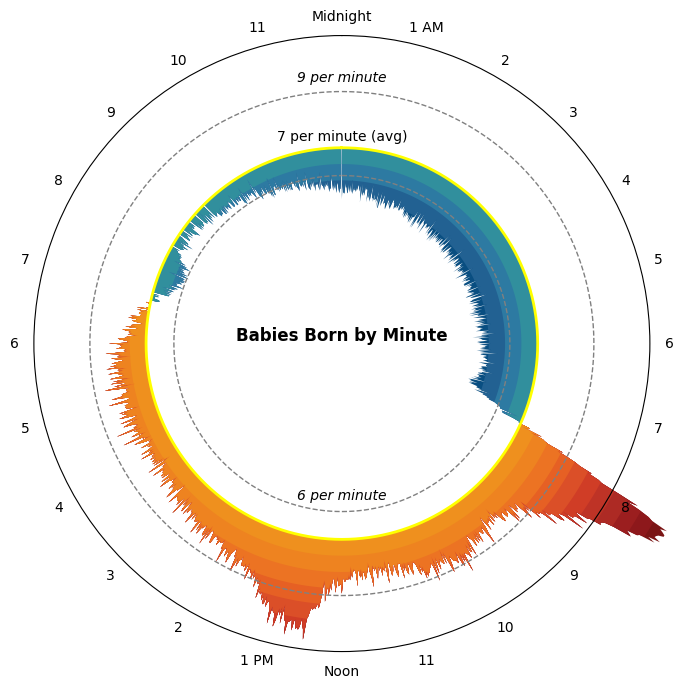

In [110]:
# Create a radial plot
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')


# Plot the actual data and fill between the average line
colors_below = ['#17b09c', '#318f9d', '#2d7aa2', '#226192', '#094e81']
colors_above = ['#fba41b', '#ef901e', '#ee8320', '#ec7323', '#e66024', '#db4f28', '#d03d26', '#be3326', '#ad2a24', '#9b1e1f', '#8d181b', '#7b1515']



# Plot the dashed lines at 6 and 9 babies per minute

ax.plot(theta,np.ones_like(theta)*average_births, color="#FFFF00", linewidth=2,zorder=4)
ax.plot(theta,np.ones_like(theta)*6, color="grey",linestyle="--", linewidth=1,zorder=4)
ax.plot(theta,np.ones_like(theta)*9, color="grey",linestyle="--", linewidth=1,zorder=4)


ax.grid(False) # Enable grid lines
ax.set_theta_zero_location("N") # Set the angular zero location to North
ax.set_theta_direction(-1) # Set the angular direction to clockwise
ax.set_xticks(np.pi/12 * np.arange(24)) # Set the angular ticks to 24 hours


ax.set_xticklabels(labels) # Set the angular tick labels to hours

for i in reversed(range(5)):
    
    ax.fill_between(theta,average_births,births.apply(lambda x: max(x,(1-i/12.0)*average_births)),
                where=births <= average_births,
                facecolor=colors_below[i],zorder=1,clip_on=False)

for i in reversed(range(12)):
    
    ax.fill_between(theta,average_births,births.apply(lambda x: min(x,(1+i/12.0)*average_births)),
                where=births > average_births,
                facecolor=colors_above[i],zorder=1,clip_on=False)

ax.set_title("Babies Born by Minute",ha='center', va='center',y=0.5,fontweight="bold") # Set the title and adjust the position

ax.text(np.deg2rad(0), average_births+0.4, "7 per minute (avg)", color="black", ha="center", va="center",zorder=4) # Add the average line label
ax.text(np.deg2rad(180), 5.4, "6 per minute", color="black", ha="center", va="center", style="italic") # Add the 6 per minute label
ax.text(np.deg2rad(0), 9.5, "9 per minute", color="black", ha="center", va="center", style="italic") # Add the 9 per minute label
# ax.set_rmax(11)
ax.set_rlabel_position(-1) # Set the radial label position to 0
ax.set_rlim(0,11)
ax.set_rticks([])

plt.show()
